In [9]:
# 导入数据

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# 读取 Excel 文件中的第三个表格数据
data = pd.read_excel('data/机器学习作业数据集.xlsx', sheet_name='表2-某风电场风速和发电功率')

# 提取风速和发电功率数据
wind_speed = data['wind_Spd'].values.reshape(-1, 1)
power_output = data['GridPower'].values.reshape(-1, 1)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(wind_speed, power_output, test_size=0.2, random_state=42)

In [10]:
#使用线性规划进行预测

# 创建线性回归模型并拟合训练集
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 进行线性回归预测
linear_predictions = linear_model.predict(X_test)

In [11]:
#使用BP神经网络进行预测

mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, random_state=42)
mlp_model.fit(X_train, y_train.ravel())

mlp_predictions = mlp_model.predict(X_test).reshape(-1, 1)

In [12]:
#比较训练效果
from sklearn.metrics import mean_squared_error, r2_score
# 评估预测效果
linear_mse = mean_squared_error(y_test, linear_predictions)

mlp_mse = mean_squared_error(y_test, mlp_predictions)


print("线性回归模型结果：")
print("均方误差(MSE):", linear_mse)

print("\nBP神经网络模型结果：")
print("均方误差(MSE):", mlp_mse)

线性回归模型结果：
均方误差(MSE): 0.008990258405659573
决定系数(R^2): 0.8928628997535948

BP神经网络模型结果：
均方误差(MSE): 0.0004287587227111074
决定系数(R^2): 0.9948904732006698


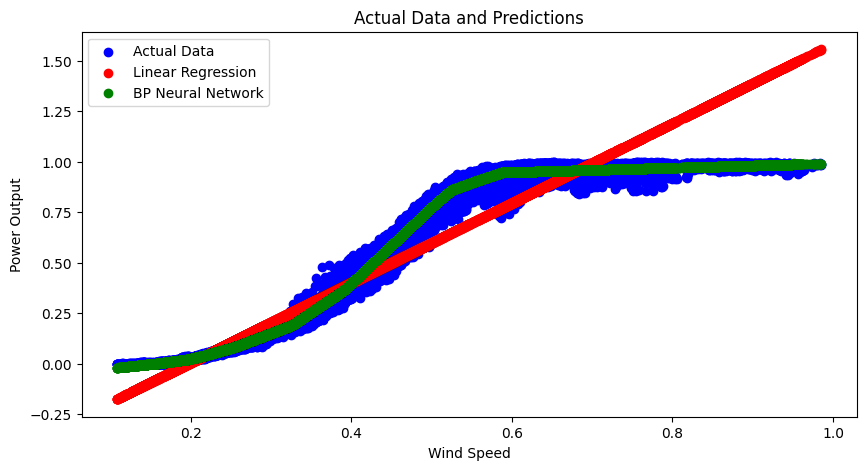

In [13]:
# 图形化展示
import matplotlib.pyplot as plt

# 绘制风速与实际数据的散点图
plt.figure(figsize=(10, 5))
plt.scatter(wind_speed, power_output, color='blue', label='Actual Data')

# 绘制风速与线性回归预测数据的散点图
plt.scatter(wind_speed, linear_model.predict(wind_speed), color='red', label='Linear Regression')

# 绘制风速与BP神经网络预测数据的散点图
plt.scatter(wind_speed, mlp_model.predict(wind_speed), color='green', label='BP Neural Network')

plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.title('Actual Data and Predictions')
plt.legend()
plt.show()